# Rainfall Prediction - Weather Forecasting
Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


Dataset available below




Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
https://github.com/dsrscientist/dataset3

In [302]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [303]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Prediction for RainTomorrow

In [304]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [305]:
data.shape

(8425, 23)

In [306]:
data.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [307]:
data['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [308]:
data['WindGustDir'].value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

In [309]:
data['WindGustSpeed'].value_counts()

39.0     441
35.0     435
37.0     422
33.0     408
31.0     396
41.0     371
30.0     367
28.0     332
43.0     302
48.0     292
26.0     275
50.0     259
46.0     258
24.0     255
52.0     249
44.0     241
22.0     223
54.0     210
20.0     186
56.0     153
57.0     148
19.0     137
61.0     114
59.0     113
63.0      95
17.0      92
65.0      74
67.0      64
72.0      62
15.0      58
13.0      57
74.0      54
70.0      53
69.0      49
76.0      44
78.0      23
80.0      22
11.0      18
85.0      14
81.0      13
91.0      12
93.0       7
89.0       7
83.0       6
9.0        6
98.0       4
94.0       3
87.0       3
7.0        2
102.0      2
100.0      2
107.0      1
Name: WindGustSpeed, dtype: int64

In [310]:
data['WindDir9am'].value_counts()

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64

In [311]:
data['WindDir3pm'].value_counts()

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64

In [312]:
data['WindSpeed9am'].value_counts()

9.0     803
0.0     752
13.0    708
4.0     610
11.0    607
7.0     572
6.0     515
17.0    481
15.0    467
19.0    430
20.0    427
24.0    312
22.0    279
2.0     258
28.0    229
26.0    208
31.0    153
30.0    114
35.0     77
33.0     70
37.0     58
41.0     49
39.0     35
44.0     29
43.0     28
46.0     26
52.0     16
50.0     10
56.0      8
54.0      6
48.0      6
61.0      2
57.0      2
63.0      2
Name: WindSpeed9am, dtype: int64

In [313]:
data['WindSpeed3pm'].value_counts()

9.0     724
19.0    639
13.0    599
20.0    594
17.0    555
11.0    534
15.0    524
24.0    511
28.0    458
22.0    457
26.0    378
7.0     331
4.0     287
30.0    279
31.0    266
6.0     240
0.0     199
33.0    170
35.0    137
37.0    125
39.0     80
2.0      58
41.0     45
43.0     34
46.0     29
44.0     18
50.0     12
48.0     11
52.0      9
56.0      7
54.0      2
61.0      2
57.0      2
65.0      1
83.0      1
Name: WindSpeed3pm, dtype: int64

In [314]:
data['Cloud9am'].value_counts()

7.0    1418
1.0    1038
8.0    1015
0.0     554
6.0     551
5.0     414
3.0     384
2.0     357
4.0     273
Name: Cloud9am, dtype: int64

In [315]:
data['Cloud3pm'].value_counts()

7.0    1294
1.0    1077
8.0     863
6.0     597
5.0     522
2.0     508
3.0     411
4.0     351
0.0     347
Name: Cloud3pm, dtype: int64

In [316]:
data['Date']

0       2008-12-01
1       2008-12-02
2       2008-12-03
3       2008-12-04
4       2008-12-05
           ...    
8420    2017-06-21
8421    2017-06-22
8422    2017-06-23
8423    2017-06-24
8424    2017-06-25
Name: Date, Length: 8425, dtype: object

changing date column to integer 

In [317]:
#extracting dat , day , year from date column and dropping the column date
data['Day']= data['Date'].str.split('-').str[2]
data['Day'] = data['Day'].astype(int)
data['Month']= data['Date'].str.split('-').str[1]
data['Month'] = data['Month'].astype(int)
data['Year'] = data['Date'].str.split('-').str[0]
data['Year'] = data['Year'].astype(int)
data.drop(['Date'],axis = 1, inplace = True)

In [318]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


Lets fill nan values by mode and mean according to data 

In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

In [320]:
data.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Day                 0
Month               0
Year                0
dtype: int64

In [321]:
data.nunique()

Location          12
MinTemp          285
MaxTemp          331
Rainfall         250
Evaporation      116
Sunshine         140
WindGustDir       16
WindGustSpeed     52
WindDir9am        16
WindDir3pm        16
WindSpeed9am      34
WindSpeed3pm      35
Humidity9am       90
Humidity3pm       94
Pressure9am      384
Pressure3pm      374
Cloud9am           9
Cloud3pm           9
Temp9am          304
Temp3pm          328
RainToday          2
RainTomorrow       2
Day               31
Month             12
Year              10
dtype: int64

In [322]:
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir9am']=data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindDir3pm']=data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])
data['RainToday']=data['RainToday'].fillna(data['RainToday'].mode()[0])
data['RainTomorrow']=data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

In [323]:
data['MinTemp']=data['MinTemp'].fillna(data['MinTemp'].mean())
data['MaxTemp']=data['MaxTemp'].fillna(data['MaxTemp'].mean())
data['Rainfall']=data['Rainfall'].fillna(data['Rainfall'].mean())
data['Evaporation']=data['Evaporation'].fillna(data['Evaporation'].mean())
data['Sunshine']=data['Sunshine'].fillna(data['Sunshine'].mean())
data['WindGustSpeed']=data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindSpeed9am']=data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed3pm']=data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['Humidity9am']=data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm']=data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data['Pressure9am']=data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm']=data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Cloud9am']=data['Cloud9am'].fillna(data['Cloud9am'].mean())
data['Cloud3pm']=data['Cloud3pm'].fillna(data['Cloud3pm'].mean())
data['Temp9am']=data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm']=data['Temp3pm'].fillna(data['Temp3pm'].mean())

In [324]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

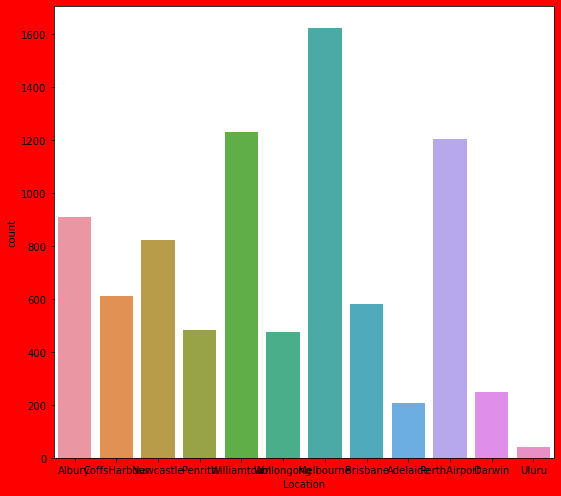

In [325]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Location']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Location'])
    plotnumber += 1
plt.tight_layout()

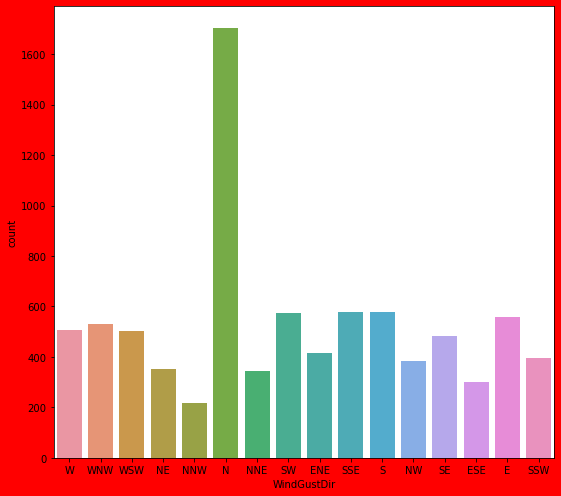

In [326]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['WindGustDir']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['WindGustDir'])
    plotnumber += 1
plt.tight_layout()

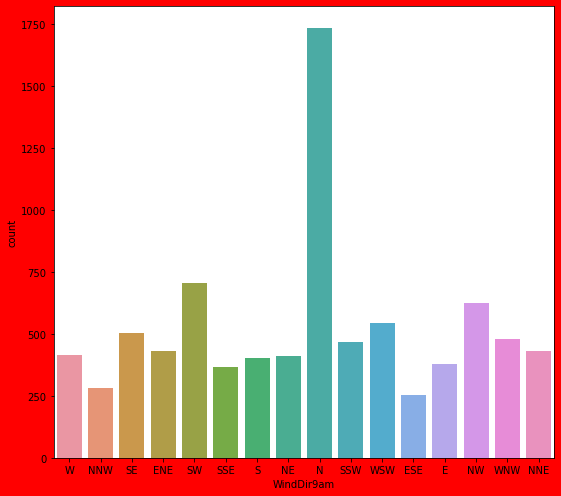

In [327]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['WindDir9am']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['WindDir9am'])
    plotnumber += 1
plt.tight_layout()

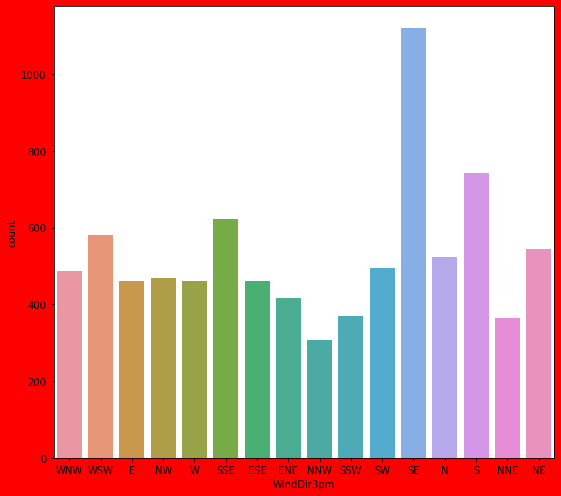

In [328]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['WindDir3pm']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['WindDir3pm'])
    plotnumber += 1
plt.tight_layout()

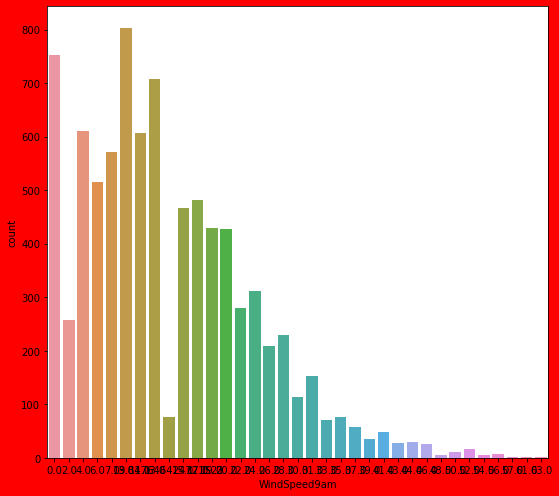

In [329]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['WindSpeed9am']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['WindSpeed9am'])
    plotnumber += 1
plt.tight_layout()

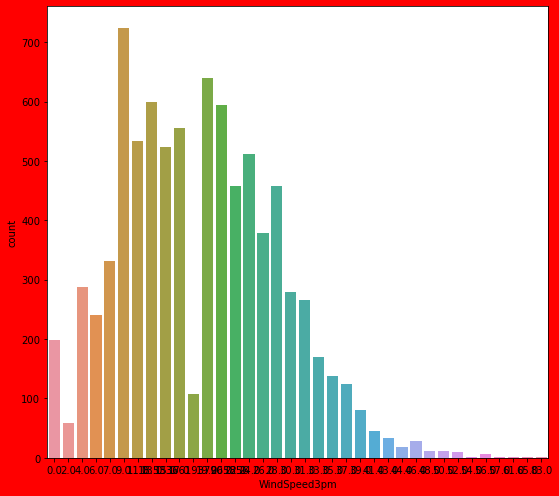

In [330]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['WindSpeed3pm']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['WindSpeed3pm'])
    plotnumber += 1
plt.tight_layout()

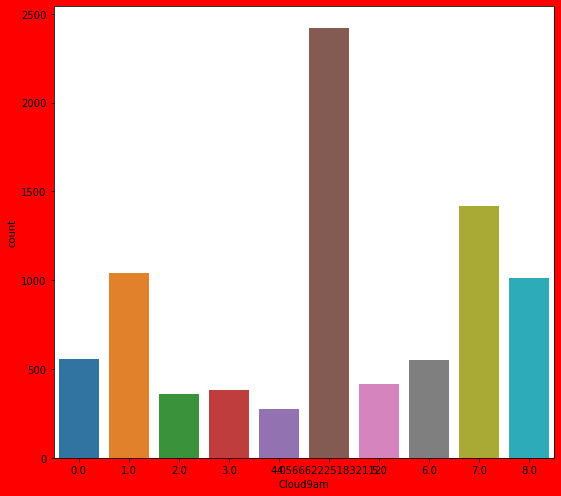

In [331]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Cloud9am']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Cloud9am'])
    plotnumber += 1
plt.tight_layout()

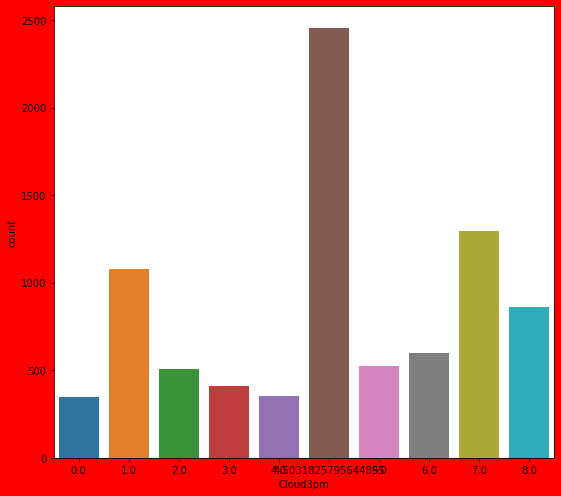

In [332]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Cloud3pm']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Cloud3pm'])
    plotnumber += 1
plt.tight_layout()

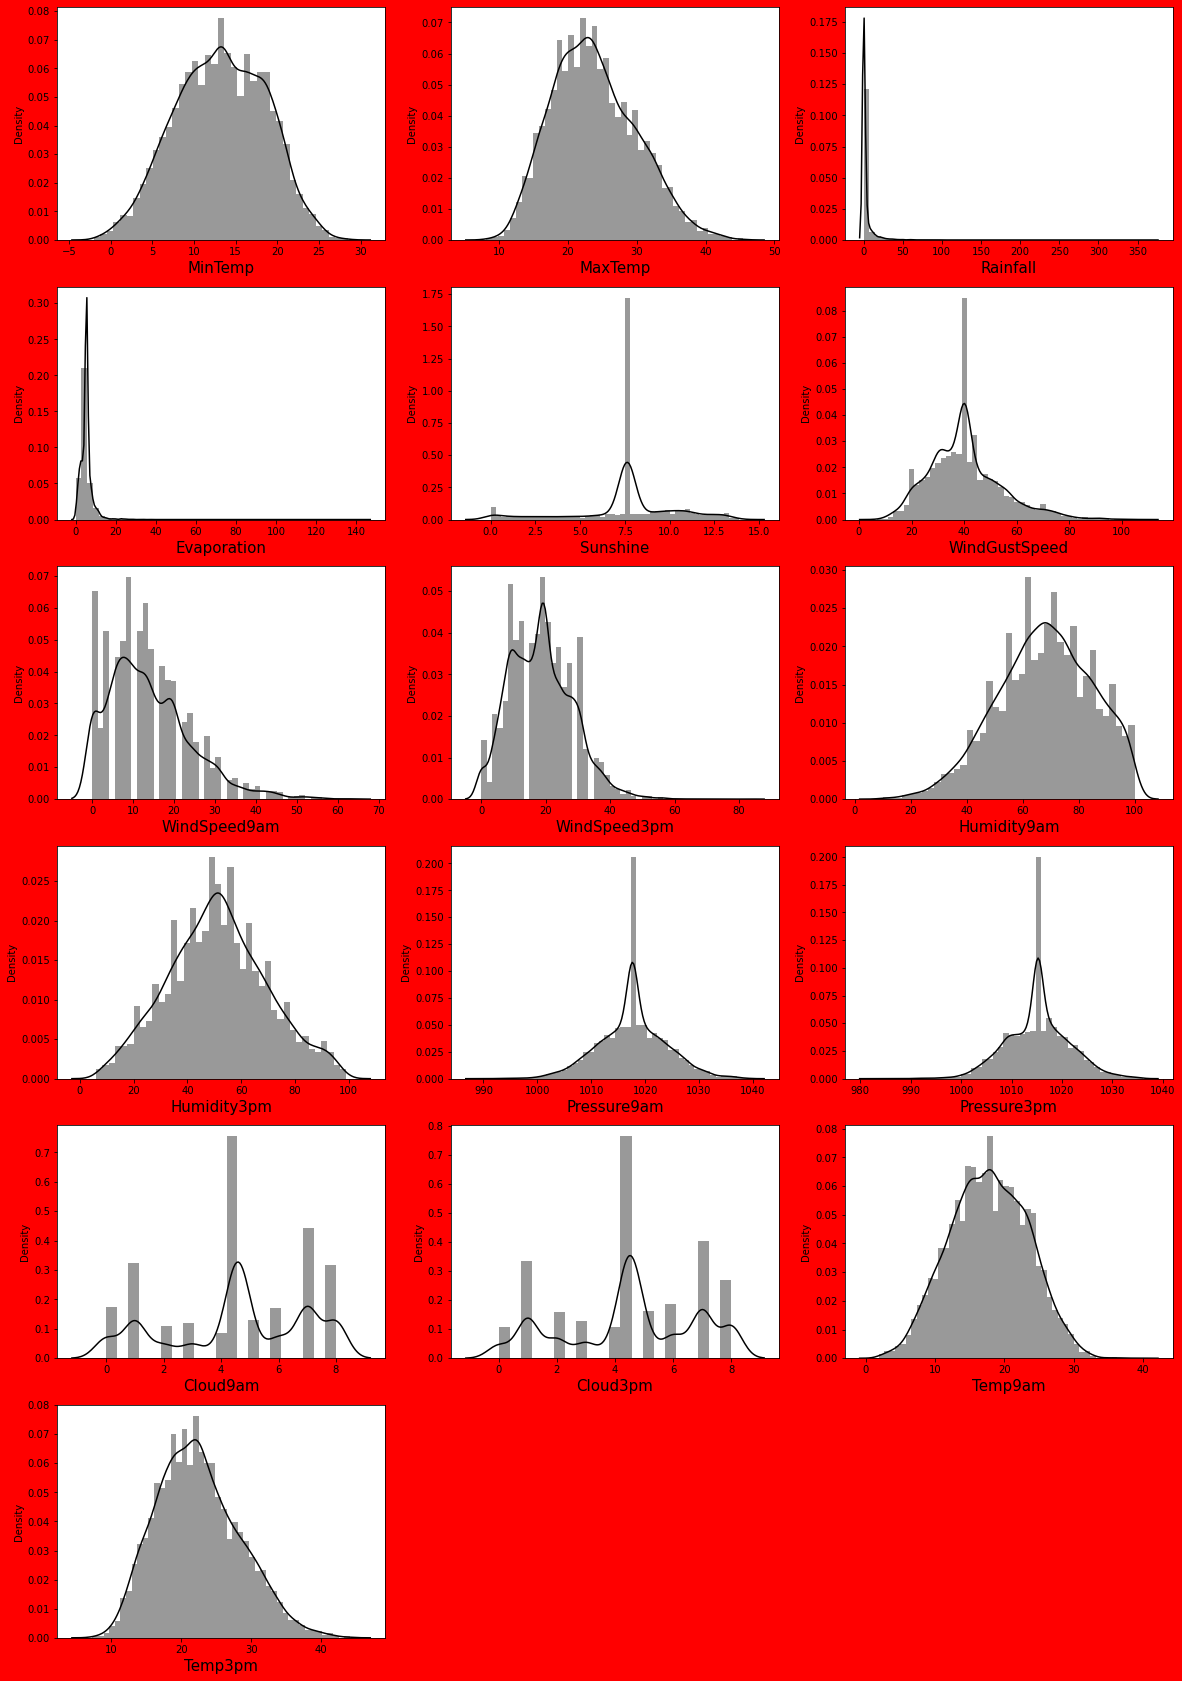

In [333]:
plt.figure(figsize = (20,30), facecolor = 'red')
plotnumber = 1

for column in data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']]: #we have only 2 columns which has continous data 
    if plotnumber <=16:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

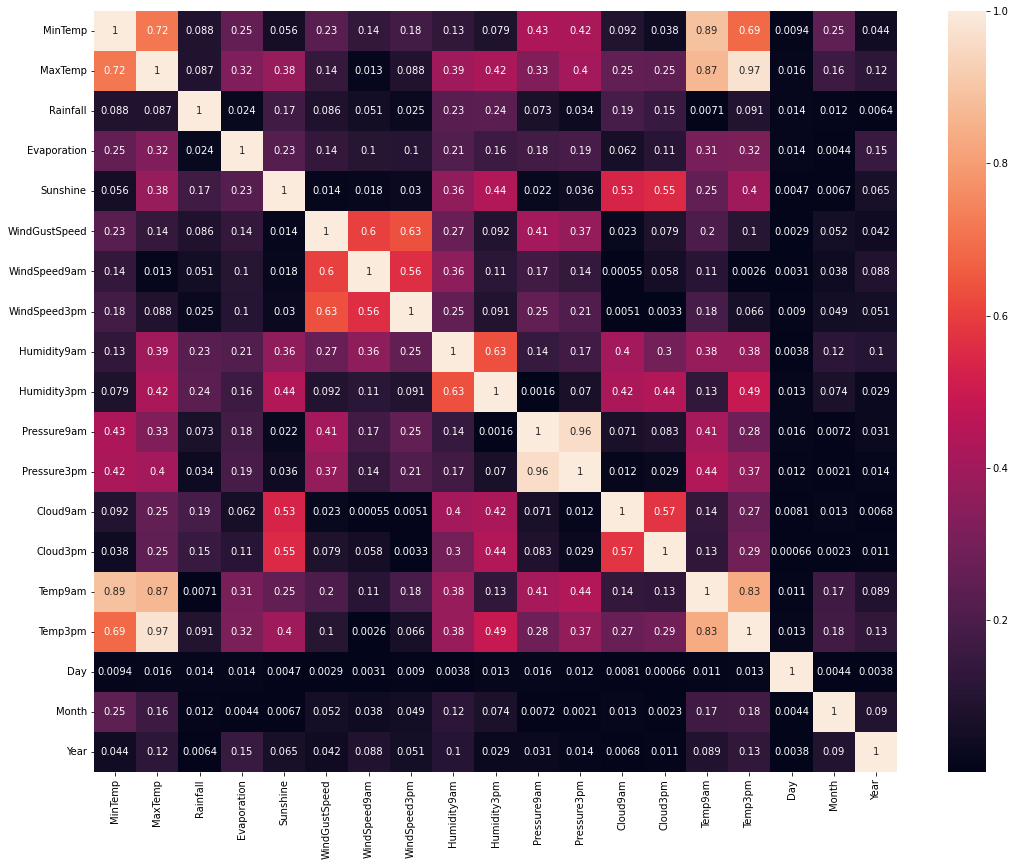

In [334]:
data_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()

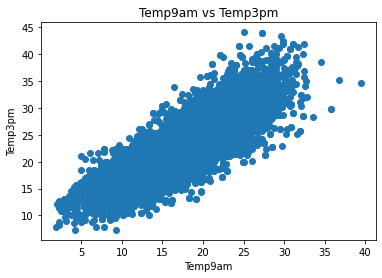

In [335]:
plt.scatter(data.Temp9am,data.Temp3pm)
plt.xlabel('Temp9am')
plt.ylabel('Temp3pm')
plt.title('Temp9am vs Temp3pm')
plt.show()

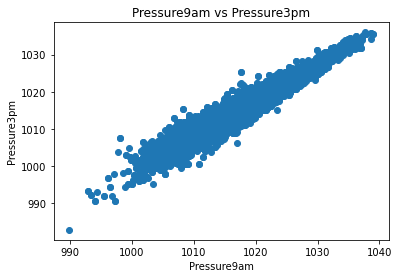

In [336]:
plt.scatter(data.Pressure9am,data.Pressure3pm)
plt.xlabel('Pressure9am')
plt.ylabel('Pressure3pm')
plt.title('Pressure9am vs Pressure3pm')
plt.show()

In [337]:
data.drop(['Temp3pm'],axis = 1, inplace = True)
data.drop(['Pressure3pm'],axis = 1, inplace = True)

No     6435
Yes    1990
Name: RainToday, dtype: int64


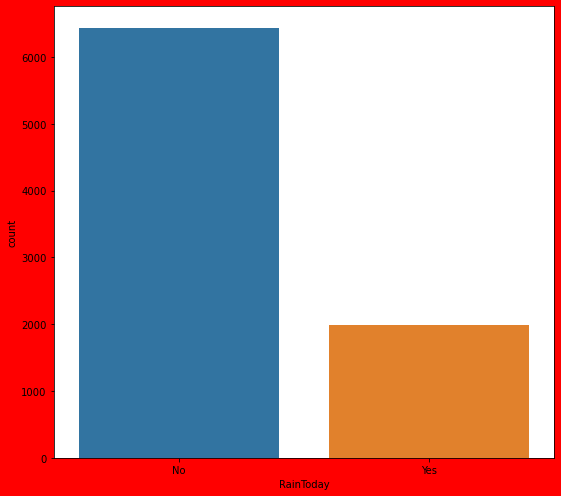

In [338]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['RainToday']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['RainToday'])
    plotnumber += 1
plt.tight_layout()
print(data['RainToday'].value_counts())

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


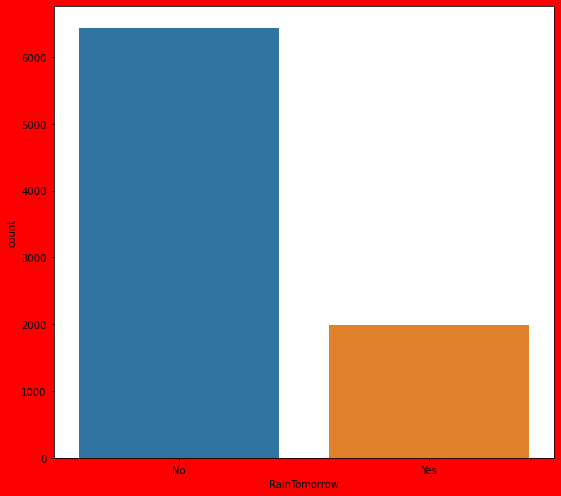

In [339]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['RainTomorrow']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['RainTomorrow'])
    plotnumber += 1
plt.tight_layout()
print(data['RainTomorrow'].value_counts())

In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   object 
 9   WindDir3pm     8425 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Cloud9am       8425 non-null   float64
 16  Cloud3pm       8425 non-null   float64
 17  Temp9am        8425 non-null   float64
 18  RainToda

# converting object to float

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


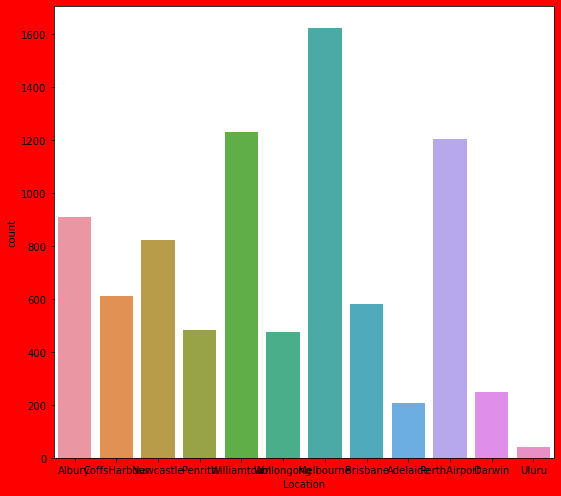

In [341]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Location']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Location'])
    plotnumber += 1
plt.tight_layout()
print(data['Location'].value_counts())

In [342]:
data['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [343]:
ord_enc=OrdinalEncoder(categories=[['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru']])
df1=ord_enc.fit_transform(data[['Location']])
print(df1)
data['Location']=df1

[[ 0.]
 [ 0.]
 [ 0.]
 ...
 [11.]
 [11.]
 [11.]]


N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


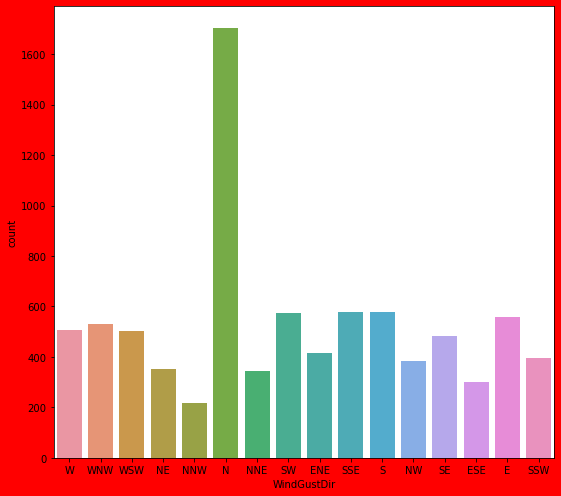

In [344]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['WindGustDir']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['WindGustDir'])
    plotnumber += 1
plt.tight_layout()
print(data['WindGustDir'].value_counts())

In [345]:
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [346]:
ord_enc=OrdinalEncoder(categories=[['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW']])
df1=ord_enc.fit_transform(data[['WindGustDir']])
print(df1)
data['WindGustDir']=df1

[[ 0.]
 [ 1.]
 [ 2.]
 ...
 [ 5.]
 [12.]
 [ 5.]]


N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


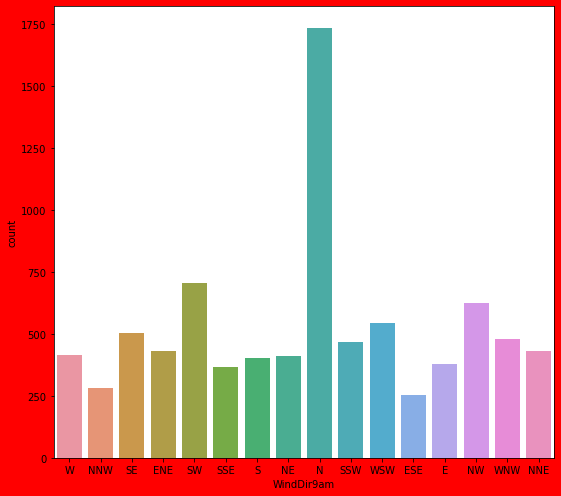

In [347]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['WindDir9am']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['WindDir9am'])
    plotnumber += 1
plt.tight_layout()
print(data['WindDir9am'].value_counts())

In [348]:
data['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [349]:
ord_enc=OrdinalEncoder(categories=[['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE']])
df1=ord_enc.fit_transform(data[['WindDir9am']])
print(df1)
data['WindDir9am']=df1

[[ 0.]
 [ 1.]
 [ 0.]
 ...
 [ 2.]
 [ 5.]
 [11.]]


SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


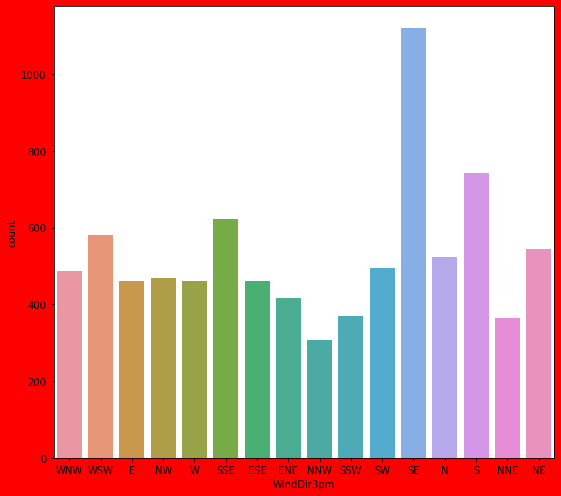

In [350]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['WindDir3pm']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['WindDir3pm'])
    plotnumber += 1
plt.tight_layout()
print(data['WindDir3pm'].value_counts())

In [351]:
data['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [352]:
ord_enc=OrdinalEncoder(categories=[['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE']])
df1=ord_enc.fit_transform(data[['WindDir3pm']])
print(df1)
data['WindDir3pm']=df1

[[ 0.]
 [ 1.]
 [ 1.]
 ...
 [ 0.]
 [12.]
 [ 6.]]


No     6435
Yes    1990
Name: RainToday, dtype: int64


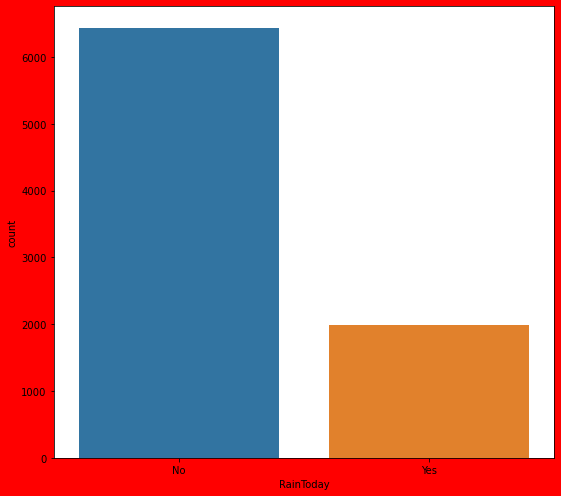

In [353]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['RainToday']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['RainToday'])
    plotnumber += 1
plt.tight_layout()
print(data['RainToday'].value_counts())

In [354]:
data['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [355]:
ord_enc=OrdinalEncoder(categories=[['No', 'Yes']])
df1=ord_enc.fit_transform(data[['RainToday']])
print(df1)
data['RainToday']=df1

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


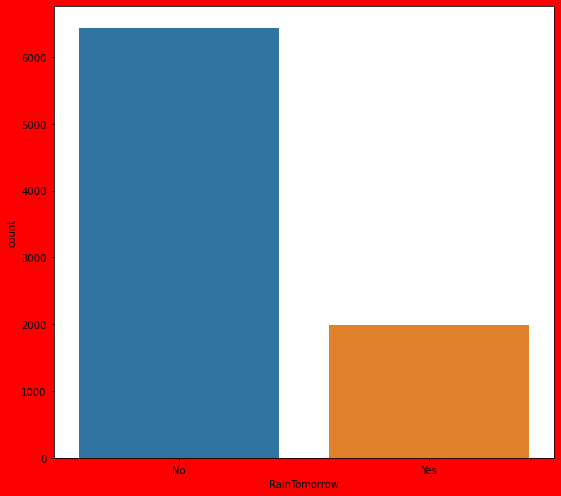

In [356]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['RainTomorrow']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['RainTomorrow'])
    plotnumber += 1
plt.tight_layout()
print(data['RainTomorrow'].value_counts())

In [357]:
data['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [358]:
ord_enc=OrdinalEncoder(categories=[['No', 'Yes']])
df1=ord_enc.fit_transform(data[['RainTomorrow']])
print(df1)
data['RainTomorrow']=df1

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [359]:
data['Day'] = data['Day'].astype(float)
data['Month'] = data['Month'].astype(float)
data['Year'] = data['Year'].astype(float)

In [360]:
data.shape

(8425, 23)

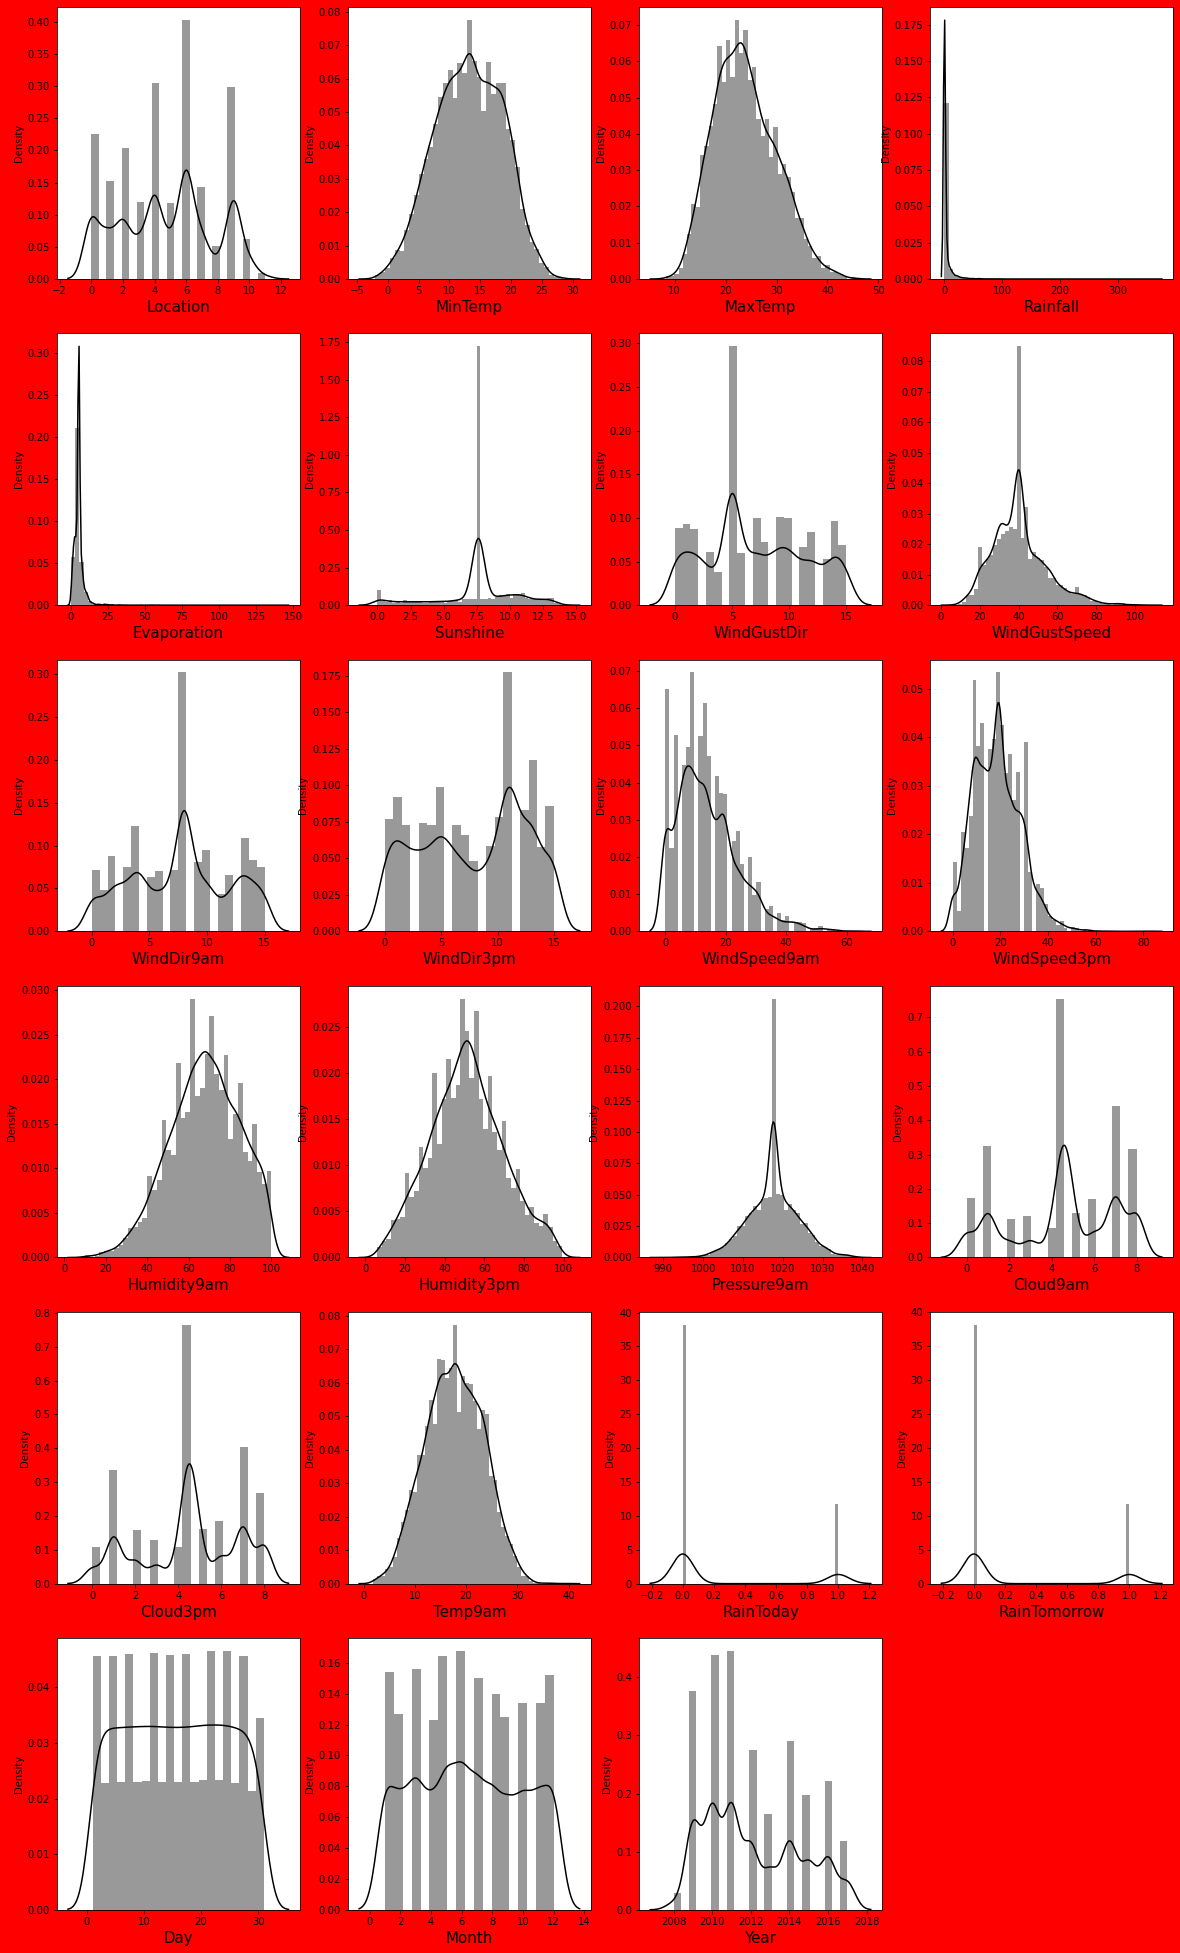

In [361]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=23:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()


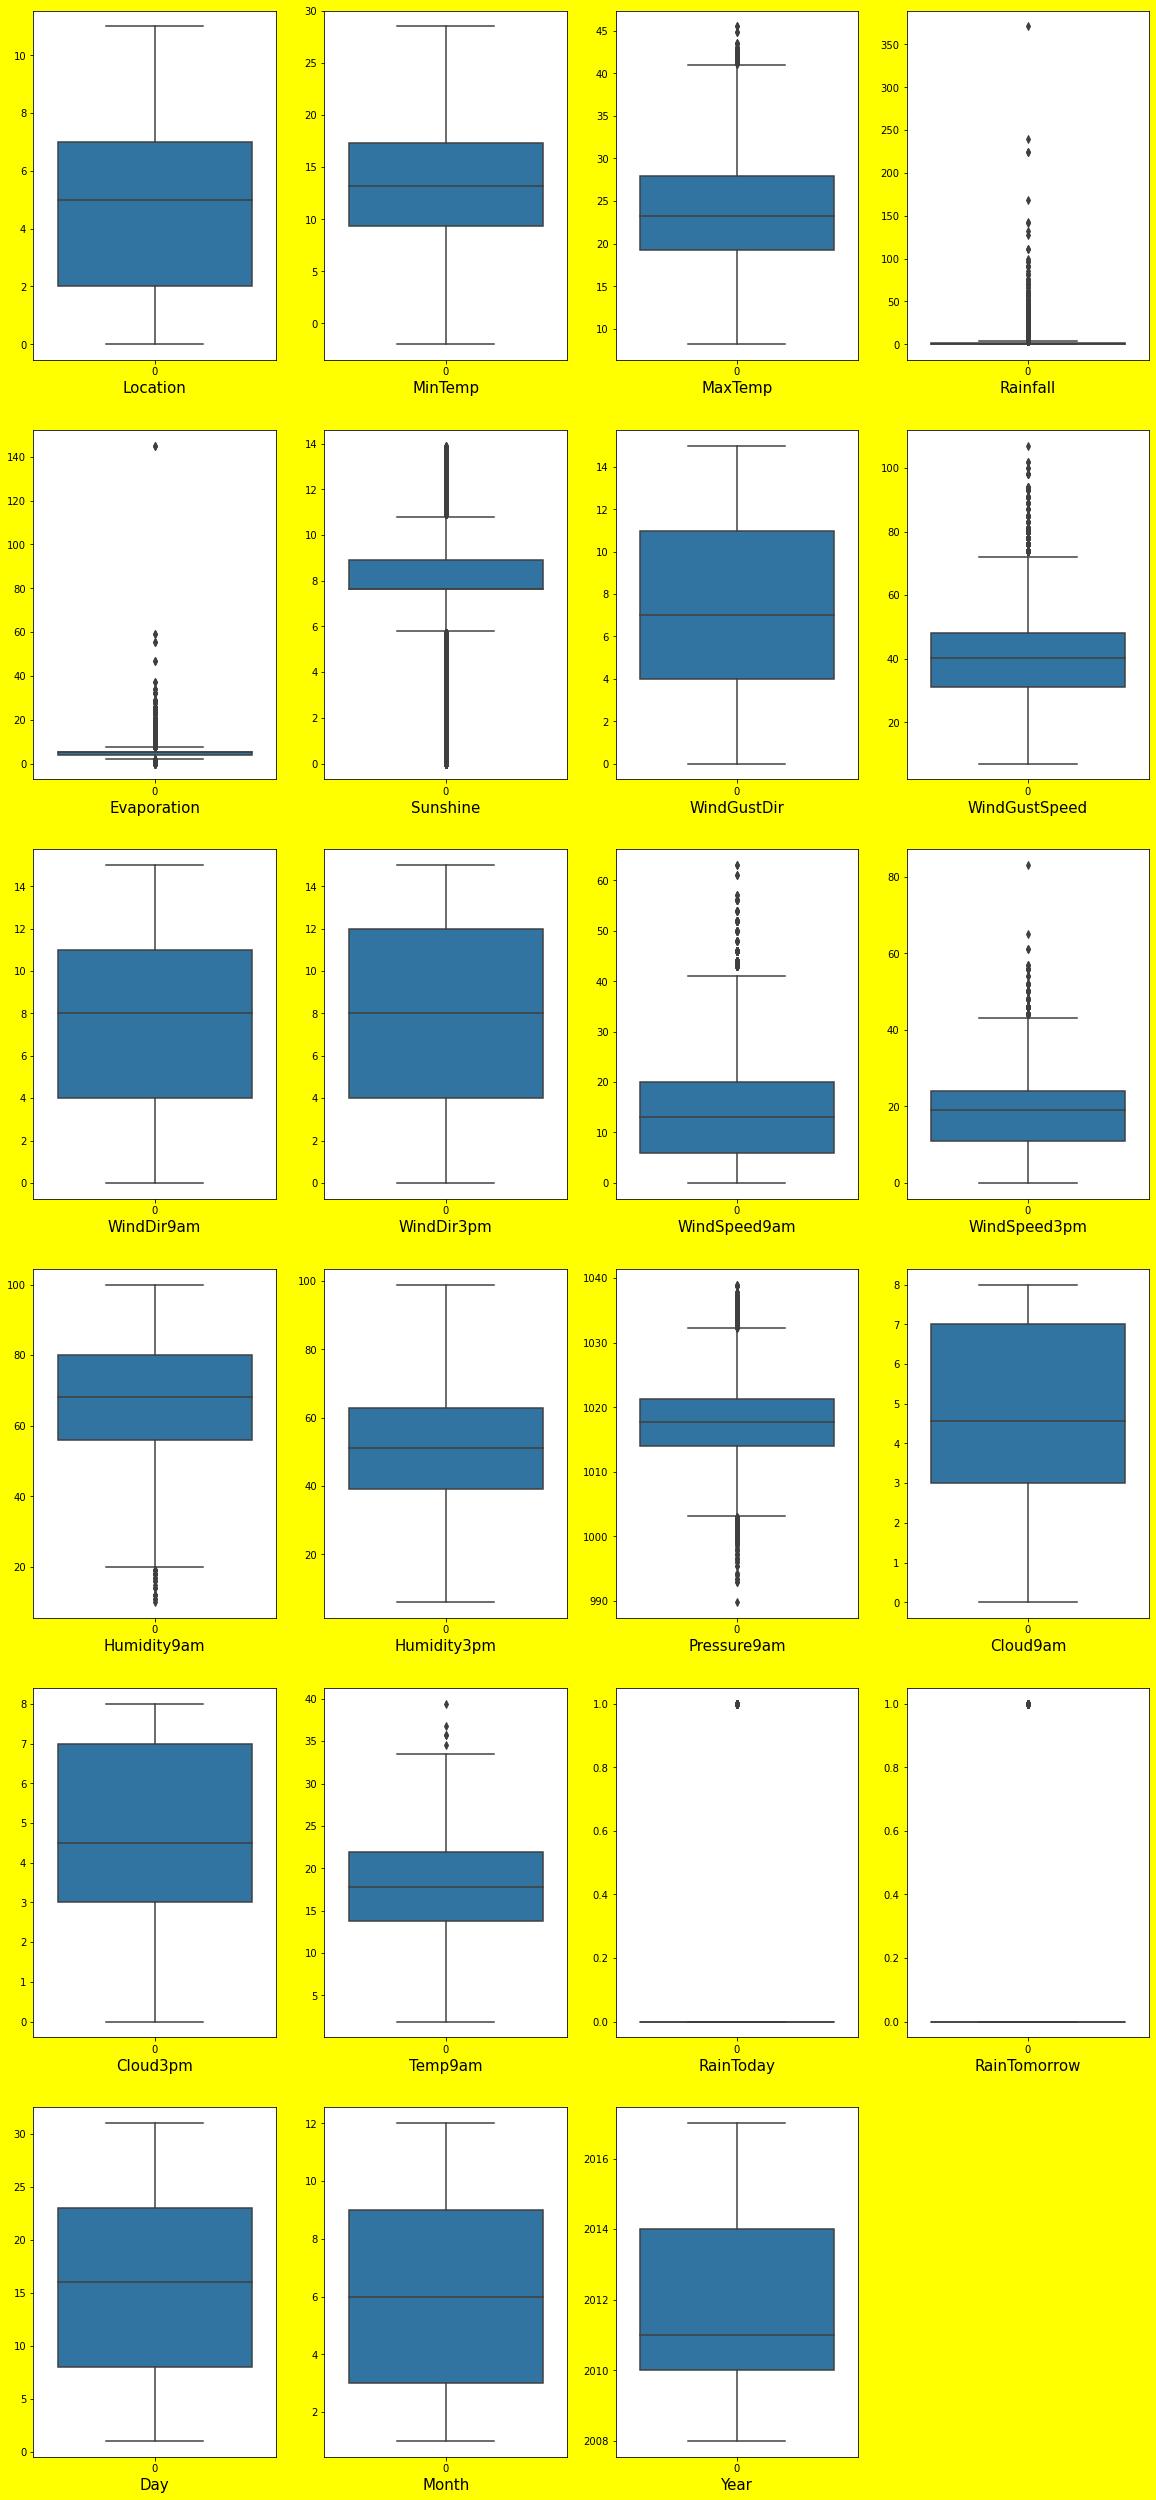

In [362]:
plt.figure(figsize=(20,45),facecolor='yellow')
graph=1
for column in data:
    if graph<=23:
        plt.subplot(6,4,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

we can see good amount of outliers

In [363]:
from scipy.stats import zscore
z_score= zscore(data)
abs_z_score=np.abs(z_score) #apply he formula and get the scaled data 

filtering_entry=(abs_z_score<2.7).all(axis=1)
data=data[filtering_entry]
data.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,RainToday,RainTomorrow,Day,Month,Year
count,7611.000000,7611.000000,7611.000000,7611.000000,7611.000000,7611.000000,7611.000000,7611.000000,7611.000000,7611.000000,...,7611.000000,7611.000000,7611.000000,7611.000000,7611.000000,7611.000000,7611.000000,7611.000000,7611.000000,7611.000000
mean,4.739850,13.039552,23.813362,1.812599,5.118012,7.815062,7.131389,38.919532,7.626856,7.875049,...,50.965672,1017.867743,4.483669,4.419860,17.659723,0.221784,0.219156,15.684273,6.418605,2012.108264
std,3.038321,5.352085,5.867595,4.409642,2.202592,2.611144,4.371100,12.203800,4.251432,4.650042,...,17.556918,5.798569,2.423377,2.286671,5.503447,0.415474,0.413702,8.788942,3.405652,2.464433
min,0.000000,-1.300000,8.400000,0.000000,0.000000,0.100000,0.000000,7.000000,0.000000,0.000000,...,6.000000,1001.000000,0.000000,0.000000,2.800000,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,2.000000,9.100000,19.400000,0.000000,4.000000,7.632205,4.000000,31.000000,4.000000,4.000000,...,39.000000,1014.500000,3.000000,3.000000,13.700000,0.000000,0.000000,8.000000,3.000000,2010.000000
50%,5.000000,13.193305,23.400000,0.000000,5.389395,7.632205,7.000000,39.000000,8.000000,8.000000,...,51.000000,1017.640233,4.566622,4.503183,17.762015,0.000000,0.000000,16.000000,6.000000,2012.000000
75%,7.000000,17.200000,27.900000,1.200000,5.389395,9.000000,10.000000,46.000000,11.000000,12.000000,...,62.000000,1021.400000,7.000000,6.000000,21.800000,0.000000,0.000000,23.000000,9.000000,2014.000000
max,11.000000,27.500000,40.300000,30.200000,15.400000,13.900000,15.000000,76.000000,15.000000,15.000000,...,99.000000,1034.500000,8.000000,8.000000,32.800000,1.000000,1.000000,31.000000,12.000000,2017.000000


In [364]:
print('The data loss Percentage for removing outlier using the IQR is ', 100-((8425/7611)*100))

The data loss Percentage for removing outlier using the IQR is  -10.695046643016681


In [365]:
data.skew()

Location         0.034703
MinTemp         -0.064380
MaxTemp          0.275576
Rainfall         3.401116
Evaporation      0.677002
Sunshine        -0.599893
WindGustDir      0.149886
WindGustSpeed    0.407254
WindDir9am      -0.014417
WindDir3pm      -0.160013
WindSpeed9am     0.625340
WindSpeed3pm     0.236739
Humidity9am     -0.182966
Humidity3pm      0.127277
Pressure9am      0.000642
Cloud9am        -0.338478
Cloud3pm        -0.250220
Temp9am         -0.041132
RainToday        1.339621
RainTomorrow     1.358066
Day              0.001564
Month            0.058759
Year             0.405704
dtype: float64

We gonna use PCA method which gonna make data skew as default 

In [369]:
scaler=StandardScaler()
X=data.drop('RainTomorrow',axis=1)

In [370]:
x = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [371]:
scaler=StandardScaler()
X=data.drop('RainTomorrow',axis=1)
X_scaled=scaler.fit_transform(X)

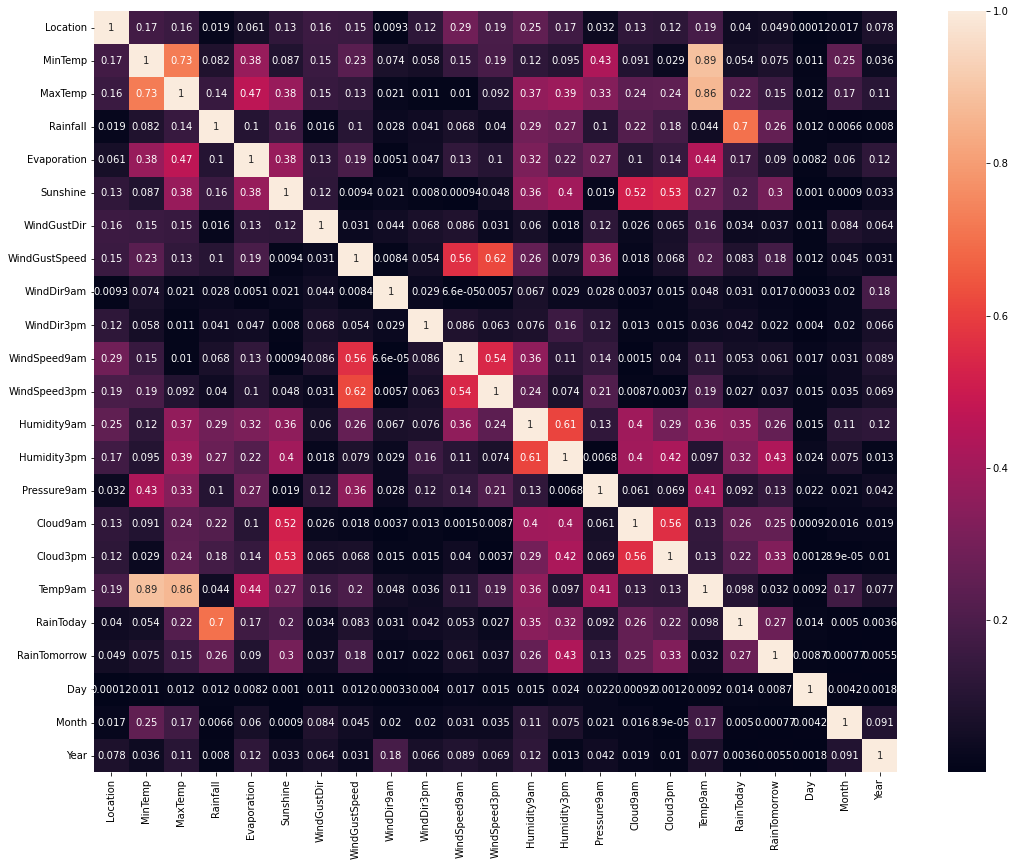

In [372]:
data_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()

As there are many features we gonna use PCA

In [373]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[ 0.29679436,  0.59035195,  1.78083499, ..., -1.00350392,
        -0.49755821, -0.32857607],
       [ 0.60403361, -1.00705234,  1.54024578, ...,  0.37560464,
         0.34378025, -0.17596262],
       [ 1.9416597 , -0.13241279,  1.9970291 , ...,  0.22145592,
         0.09269074, -0.14822084],
       ...,
       [ 0.39543947, -1.83073778,  0.61382648, ...,  0.28553484,
         0.76299948,  0.29952451],
       [ 1.11745311, -2.26379012, -0.28195149, ..., -0.07161879,
         0.48704948,  0.14887407],
       [ 0.11058923,  0.48897206,  0.3927948 , ...,  0.06724628,
        -0.44387732,  0.37293591]])

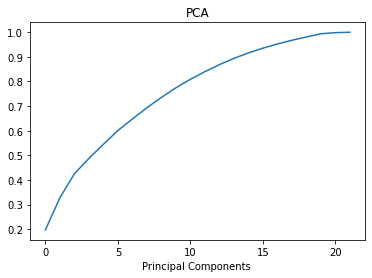

In [374]:
#lets plot scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))#cumsum=cummulative summention
plt.xlabel('Principal Components ')
plt.title('PCA')
plt.show()
#explained_variance_ratio_ = how much data variance u can explain if ur using on component 
#cumsum = it will increase its value by adding one + another data then another and so on 

we can achieve 90+% by 18 columns

In [375]:
pca=PCA(n_components=18)
new_pcomp=pca.fit_transform(X_scaled)
princi_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.296794,0.590352,1.780835,-1.231302,-2.885812,1.753105,-1.418290,2.148188,0.280305,0.999466,0.137922,-0.472089,-0.697060,0.472640,-1.048416,-0.633259,-0.831854,0.468711
1,0.604034,-1.007052,1.540246,-0.970289,-3.109958,1.813092,-1.178356,2.028971,0.512397,0.736054,0.188247,-0.022758,-0.980553,-0.018123,-0.400207,0.430746,0.276583,-0.434814
2,1.941660,-0.132413,1.997029,-0.837733,-3.227833,1.306247,-1.020007,1.795826,0.263458,0.593632,0.274809,-0.360228,-1.195470,0.170054,0.102970,-0.955114,-0.509837,-0.419374
3,0.476707,-1.970431,0.439508,-0.677974,-2.625975,1.117670,-1.703252,1.918979,1.041529,0.451547,0.676479,1.211304,-0.631335,0.533468,0.181352,-0.221407,-0.334450,-0.065721
4,0.081986,0.978951,-0.213073,-1.628181,-2.701909,1.803889,-0.970658,1.716868,0.859099,0.250806,0.264965,-0.118019,-0.735581,0.861864,-0.891443,0.958550,0.036050,0.787113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7606,-0.039327,-2.340818,0.783742,0.600341,2.222304,-1.129572,-2.182139,-0.396943,0.671943,0.878977,-1.678365,0.930998,0.219932,-1.147910,-0.415800,0.148889,0.122798,-0.203598
7607,-0.251945,-2.492679,0.242500,0.208634,1.221757,-0.253085,-1.514994,-0.526492,0.345851,-0.130698,-2.828772,1.551235,1.094570,-0.654177,-0.644589,-0.070803,-0.262583,-0.409301
7608,0.395439,-1.830738,0.613826,0.461349,1.504491,1.027395,-2.928096,-0.434632,-0.072870,0.233885,-2.000191,0.670474,0.333575,-0.440514,-0.319924,0.251313,0.356858,0.273790
7609,1.117453,-2.263790,-0.281951,0.762149,1.694842,-0.836520,-1.103501,-0.899447,0.690161,-0.270507,-1.719850,0.957353,0.258751,-1.634339,-0.305108,-0.730487,-0.001861,-0.220835


In [376]:
y=data['RainTomorrow']

In [377]:
y.value_counts()

0.0    5943
1.0    1668
Name: RainTomorrow, dtype: int64

In [378]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(princi_comp, y)

y_sm.value_counts()

0.0    5943
1.0    5943
Name: RainTomorrow, dtype: int64

In [379]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=355)

In [380]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n===============Train Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        
        print('\n===============Test Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [381]:
from sklearn.svm import SVC
svc=SVC()
#svc model training and printing train and test score 
svc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :87.35%

===============Test Reasult=============
Accuracy SCore :84.92%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      1458
         1.0       0.81      0.46      0.59       445

    accuracy                           0.85      1903
   macro avg       0.83      0.71      0.75      1903
weighted avg       0.84      0.85      0.83      1903



In [406]:
SVC_CVS=cross_val_score(svc,X_scaled,y,cv=5).mean()
SVC_CVS

0.8130319766212857

In [384]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#lr model training and printing train and test score 
lr.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :83.01%

===============Test Reasult=============
Accuracy SCore :83.92%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      1458
         1.0       0.75      0.46      0.57       445

    accuracy                           0.84      1903
   macro avg       0.80      0.71      0.74      1903
weighted avg       0.83      0.84      0.82      1903



In [385]:
lr_CSV=cross_val_score(lr,X_scaled,y,cv=2).mean()
lr_CSV

0.7732297299443509

In [386]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
#DTC model training and printing train and test score 
DTC.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(DTC,x_train,x_test,y_train,y_test,train=True)
print_score(DTC,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :100.00%

===============Test Reasult=============
Accuracy SCore :83.97%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      1458
         1.0       0.65      0.67      0.66       445

    accuracy                           0.84      1903
   macro avg       0.78      0.78      0.78      1903
weighted avg       0.84      0.84      0.84      1903



In [387]:
DTC_csv=cross_val_score(DTC,X_scaled,y,cv=2).mean()
DTC_csv

0.5826051679932716

In [388]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#knn model training and printing train and test score 
knn.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(knn,x_train,x_test,y_train,y_test,train=True)
print_score(knn,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :86.46%

===============Test Reasult=============
Accuracy SCore :81.87%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      1458
         1.0       0.68      0.42      0.52       445

    accuracy                           0.82      1903
   macro avg       0.76      0.68      0.71      1903
weighted avg       0.80      0.82      0.80      1903



In [389]:
knn_csv=cross_val_score(knn,X_scaled,y,cv=2).mean()
knn_csv

0.7751956417110268

In [390]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
#rfc model training and printing train and test score 
rfc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(rfc,x_train,x_test,y_train,y_test,train=True)
print_score(rfc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :100.00%

===============Test Reasult=============
Accuracy SCore :87.70%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      1458
         1.0       0.85      0.58      0.69       445

    accuracy                           0.88      1903
   macro avg       0.87      0.77      0.80      1903
weighted avg       0.87      0.88      0.87      1903



In [391]:
rfc_csv=cross_val_score(rfc,X_scaled,y,cv=2).mean()
rfc_csv

0.7095183412593574

In [392]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier() 
gbdt.fit(x_train,y_train) 
print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :87.72%

===============Test Reasult=============
Accuracy SCore :84.18%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1458
         1.0       0.77      0.46      0.58       445

    accuracy                           0.84      1903
   macro avg       0.81      0.71      0.74      1903
weighted avg       0.83      0.84      0.83      1903



In [393]:
gbdt_csv=cross_val_score(gbdt,X_scaled,y,cv=2).mean()
gbdt_csv

0.5623788568157477

In [403]:
ada = AdaBoostClassifier() 
ada.fit(x_train,y_train) 
print_score(ada,x_train,x_test,y_train,y_test,train=True)
print_score(ada,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :84.09%

===============Test Reasult=============
Accuracy SCore :82.40%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      1458
         1.0       0.69      0.45      0.54       445

    accuracy                           0.82      1903
   macro avg       0.77      0.69      0.72      1903
weighted avg       0.81      0.82      0.81      1903



In [404]:
ada_csv=cross_val_score(ada,X_scaled,y,cv=2).mean()
ada_csv

0.6869197815469454

In [399]:
bgg = BaggingClassifier() 
bgg.fit(x_train,y_train) 
print_score(bgg,x_train,x_test,y_train,y_test,train=True)
print_score(bgg,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :98.84%

===============Test Reasult=============
Accuracy SCore :86.34%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      1458
         1.0       0.81      0.54      0.65       445

    accuracy                           0.86      1903
   macro avg       0.84      0.75      0.78      1903
weighted avg       0.86      0.86      0.85      1903



In [400]:
bgg_csv=cross_val_score(bgg,X_scaled,y,cv=2).mean()
bgg_csv

0.6471141768685311

In [407]:
#Cross validation score 
print('********* Cross Validation Score*********')
print('knn_csv --> ',knn_csv)
print('DTC_csv --> ',DTC_csv)
print('lr_CSV --> ',lr_CSV)
print('SVC_CVS --> ',SVC_CVS)
print('rfc_csv --> ',rfc_csv)
print('gbdt_csv --> ',gbdt_csv)
print('bgg_csv --> ',bgg_csv)
print('ada_csv --> ',ada_csv)

********* Cross Validation Score*********
knn_csv -->  0.7751956417110268
DTC_csv -->  0.5826051679932716
lr_CSV -->  0.7732297299443509
SVC_CVS -->  0.8130319766212857
rfc_csv -->  0.7095183412593574
gbdt_csv -->  0.5623788568157477
bgg_csv -->  0.6471141768685311
ada_csv -->  0.6869197815469454


SVC got the highest accuracy

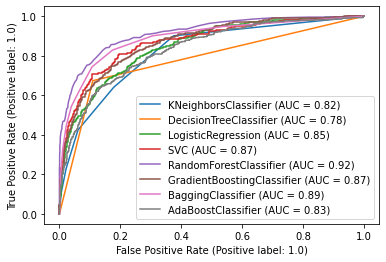

In [408]:
disp=plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(DTC,x_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(bgg,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

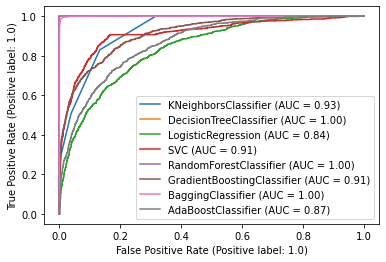

In [409]:
disp=plot_roc_curve(knn,x_train,y_train)
plot_roc_curve(DTC,x_train,y_train,ax=disp.ax_)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(gbdt,x_train,y_train,ax=disp.ax_)
plot_roc_curve(bgg,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ada,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [410]:
auc_score = roc_auc_score(y_test,y_test)
print(auc_score)

1.0


# TUNNING

In [411]:
from sklearn.model_selection import GridSearchCV

In [412]:
params ={'C': [ 10, 100],
        'gamma': [ 0.1, 0.01],
        'kernel': ['rbf']}

In [413]:
SVC_grid=GridSearchCV(SVC(),params,cv=2)

In [414]:
SVC_grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [10, 100], 'gamma': [0.1, 0.01],
                         'kernel': ['rbf']})

In [415]:
SVC_grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [416]:
SVC_clf=SVC(C= 100, gamma= 0.01,kernel='rbf')
SVC_clf.fit(x_train,y_train)
pred=SVC_clf.predict(x_train)

SVC_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print('\n==================Train Result=============')
print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{SVC_clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_train,pred)}\n")
#******************* Test SCore**********************
pred=SVC_clf.predict(x_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print('***********test results***********')
print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_test,pred)}\n")


==================Train Result=============
Accuracy Score:89.42%
-----------------------------------------
Classification Report:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.894973     0.889308  0.894184     0.892140      0.893759
recall        0.980379     0.578087  0.894184     0.779233      0.894184
f1-score      0.935731     0.700694  0.894184     0.818212      0.885372
support    4485.000000  1223.000000  0.894184  5708.000000   5708.000000
----------------------------------
confusion matrix:
[[4397   88]
 [ 516  707]]

***********test results***********
Accuracy Score:84.81%
-----------------------------------------
Classification Report:
                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.863721    0.763514  0.848135     0.813617      0.840289
recall        0.951989    0.507865  0.848135     0.729927      0.848135
f1-score      0.905710    0.609987  0.848135     0.757848      0.836557
support    1

# By tunning we got 84.81% where as without tunning we got 81.3 i.e more than 3%

.

.

.

.

.

# Prediction for Rainfall

In [425]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [419]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,RainToday,RainTomorrow,Day,Month,Year
0,0.0,13.4,22.9,0.6,5.389395,7.632205,0.0,44.0,0.0,0.0,...,22.0,1007.7,8.000000,4.503183,16.9,0.0,0.0,1.0,12.0,2008.0
1,0.0,7.4,25.1,0.0,5.389395,7.632205,1.0,44.0,1.0,1.0,...,25.0,1010.6,4.566622,4.503183,17.2,0.0,0.0,2.0,12.0,2008.0
2,0.0,12.9,25.7,0.0,5.389395,7.632205,2.0,46.0,0.0,1.0,...,30.0,1007.6,4.566622,2.000000,21.0,0.0,0.0,3.0,12.0,2008.0
3,0.0,9.2,28.0,0.0,5.389395,7.632205,3.0,24.0,2.0,2.0,...,16.0,1017.6,4.566622,4.503183,18.1,0.0,0.0,4.0,12.0,2008.0
4,0.0,17.5,32.3,1.0,5.389395,7.632205,0.0,41.0,3.0,3.0,...,33.0,1010.8,7.000000,8.000000,17.8,0.0,0.0,5.0,12.0,2008.0


In [420]:
data.shape

(7611, 23)

In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7611 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       7611 non-null   float64
 1   MinTemp        7611 non-null   float64
 2   MaxTemp        7611 non-null   float64
 3   Rainfall       7611 non-null   float64
 4   Evaporation    7611 non-null   float64
 5   Sunshine       7611 non-null   float64
 6   WindGustDir    7611 non-null   float64
 7   WindGustSpeed  7611 non-null   float64
 8   WindDir9am     7611 non-null   float64
 9   WindDir3pm     7611 non-null   float64
 10  WindSpeed9am   7611 non-null   float64
 11  WindSpeed3pm   7611 non-null   float64
 12  Humidity9am    7611 non-null   float64
 13  Humidity3pm    7611 non-null   float64
 14  Pressure9am    7611 non-null   float64
 15  Cloud9am       7611 non-null   float64
 16  Cloud3pm       7611 non-null   float64
 17  Temp9am        7611 non-null   float64
 18  RainToda

In [418]:
data['Rainfall']

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 7611, dtype: float64

In [421]:
x=data.drop(['Rainfall'],axis=1)
y=data['Rainfall']

In [424]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [426]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=ada.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.4667764582820977
Test accuracy  -  0.44020130888081255


In [427]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=lr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.5009930555833451
Test accuracy  -  0.5159846149423333


In [428]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=dt.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 1.0
Test accuracy  -  0.30967901925834174


In [429]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=knn.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.43919516732661723
Test accuracy  -  0.18300662921464828


In [430]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=gbr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - 0.6465303591035687
Test accuracy  -  0.5674174216392346


In [431]:
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=svr.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)

Train accuracy  - -0.1358863575415883
Test accuracy  -  -0.1327118197914816


In [432]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('Train accuracy  -',accuracy)
y_test_pred=rf.predict(x_test)
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Test accuracy  - ',accuracy)


Train accuracy  - 0.9494706969382066
Test accuracy  -  0.6494303078455284


# Only random forest is giving the best accuracy

In [433]:
from sklearn.model_selection import GridSearchCV

In [434]:
params ={'n_estimators':[100,150],
        'criterion':['mse','mae'], 
        'min_samples_split':[2,3], 
        'bootstrap':[True,,False]
        }

In [436]:
RF_grid=GridSearchCV(RandomForestRegressor(),params,cv=2)

In [437]:
RF_grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'min_samples_split': [2], 'n_estimators': [100, 150]})

In [438]:
RF_grid.best_estimator_

RandomForestRegressor(n_estimators=150)

In [467]:
RF_model=RandomForestRegressor(n_estimators = 300, criterion='mse', min_samples_split=2, max_depth=60,bootstrap='True')
RF_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap='True', max_depth=60, n_estimators=300)

In [468]:
pred=RF_model.predict(x_test)

In [469]:
print('R2_Score:',r2_score(y_test,pred)*100)

R2_Score: 65.74383260599899


we have increased by 1%

In [470]:
import pickle

In [471]:
pickle.dump(RF_model,open('Rainfall Prediction - Weather Forecasting','wb'))